Student Number: 22325286
Luthuli O

Dataset And Justification

Dataset1:Crime Stats of South Africa 2011-2023 by (Kaggle)
[https://www.kaggle.com/datasets/harutyunagababyan/crime-stats-of-south-africa-2011-2023]

Relevance:  
This dataset is crucial because it provides detailed, official counts of different types of crimes across South Africa over a long period (2011-2023). It covers multiple crime categories and geographic units, which allows me to identify high crime areas (hotspots) and study crime trends over time. This helps in forecasting future crime patterns and supporting better resource allocation for law enforcement. The data is directly tied to crime incidents rather than case reports, giving a more accurate picture of the criminal activity levels. Understanding these spatial and temporal patterns is essential for developing data-driven strategies to reduce crime.

Dataset2:General Household Survey Data from 2012 to 2022 by (Kaggle)
[https://www.kaggle.com/datasets/viroshensewpaul/general-household-survey-data-from-2012-to-2022]

Relevance:
This dataset provides detailed demographic and socioeconomic information across South African provinces over a 10-year period. It includes important variables like population size, unemployment rate, education levels, and household characteristics that help explain underlying factors influencing crime. Using this data alongside crime statistics allows me to build more accurate hotspot classification models by linking social context to crime occurrence. The multi-year and multi-level data structure supports analysis of trends and relationships between social conditions and crime patterns.



Importing Required Libraries

To begin the analysis, I will import all essential Python libraries needed for data manipulation, visualization, and modeling. These include pandas and numpy for data handling, matplotlib and seaborn for plotting, and scikit-learn for machine learning tasks.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

 Accessing Dataset from Google Drive
In this step, we mount Google Drive to Google Colab.
This allows us to directly access the dataset files that are stored in our group’s Drive folder.

drive.mount('/content/drive') → connects Colab to Google Drive.
Once mounted, we can navigate folders and load our dataset for preprocessing.
This is important because our dataset is too large to upload manually every time, and Google Drive provides a permanent, shareable storage location for the group and lecturer.

In [46]:
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### List Files in GHS_Survey_Data and Crime_Statistics Folders

This code lists all files in each of your two main dataset folders in Google Drive.


In [19]:
import os

# Define paths for each dataset
ghs_path = '/content/drive/MyDrive/GHS_Survey_Data'
crime_path = '/content/drive/MyDrive/Crime_Statistics'

# List files in the GHS survey folder
print("Files in GHS_Survey_Data folder:", os.listdir(ghs_path))

# List files in the crime statistics folder
print("Files in Crime_Statistics folder:", os.listdir(crime_path))


Files in GHS_Survey_Data folder: ['greatlearning-brand-v1-2.svg', 'ghs-2018-person-v1.csv', 'ghs-2017-person-1.0.csv', 'ghs-2019-person-v1.csv', 'ghs-2021-person-v1.csv', 'ghs-2020-person-v1.csv', 'ghs-2014-person-v1.csv', 'ghs-2022-person-v1.csv', 'ghs-2016-person-v1.csv', 'ghs-2015-person-v1.csv', 'ghs-2013-person-v1.csv']
Files in Crime_Statistics folder: ['contact_related_crime_incidents_by_category.csv', 'aggravated_robbery_incidents_by_category.csv', 'crimes_detected_as_a_result_of_police_action.csv', 'sexual_offence_incidents_by_category.csv', 'contact_crime_incidents_by_category.csv', 'property_related_crime_incidents_by_category.csv', 'other_serious_crime_incidents_by_category.csv']


### Previewing Your Datasets

This notebook cell previews one file from each of your main data folders—GHS survey data and crime statistics. This helps you understand the data structures and column names before further analysis.


In [20]:
import pandas as pd

# Preview a General Household Survey (GHS) data file
ghs_file = '/content/drive/MyDrive/GHS_Survey_Data/ghs-2018-person-v1.csv'  # Change to a filename you have
df_ghs = pd.read_csv(ghs_file)
print("GHS Survey Data preview:")
print(df_ghs.head())
print(df_ghs.columns)

# Preview a Crime Statistics data file
crime_file = '/content/drive/MyDrive/Crime_Statistics/contact_related_crime_incidents_by_category.csv'  # Change to a filename you have
df_crime = pd.read_csv(crime_file)
print("\nCrime Statistics Data preview:")
print(df_crime.head())
print(df_crime.columns)


GHS Survey Data preview:
                 UqNr  PersonNR          PSU  Prov  B_Nights  Gender  Age  \
0  160100720000002201         1  16010072000     1         1       1   19   
1  160100720000005901         1  16010072000     1         1       1   31   
2  160100720000005901         2  16010072000     1         1       2   25   
3  160100720000005901         3  16010072000     1         1       2    1   
4  160101220000002601         1  16010122000     1         1       2   71   

   Age_grp1  Race  F_Linsidehh  ...  Literacy3b  stratum  geotype    Q42msal  \
0         4     2            1  ...           0    10301        3       2900   
1         7     1            9  ...           0    10301        3      12480   
2         6     1            9  ...           0    10301        3       8960   
3         1     1            9  ...           0    10301        3  888888888   
4        15     2            1  ...           0    10103        1  888888888   

   Metro_code  Metro  employ_St

### Summarizing Dataset Structure and Key Statistics

Before performing any analysis, it is essential to briefly summarize the structure and key statistics of each dataset. This step helps identify data types, missing values, and major variables, providing a clear understanding of your available data and highlighting any potential issues.


In [22]:
# For summarizing the GHS Survey dataset
print("GHS Survey Data structure:")
print(df_ghs.info())
print("\nGHS Survey Data summary statistics:")
print(df_ghs.describe(include='all'))

# For summarizing the Crime Statistics dataset
print("\nCrime Statistics Data structure:")
print(df_crime.info())
print("\nCrime Statistics Data summary statistics:")
print(df_crime.describe(include='all'))


GHS Survey Data structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71137 entries, 0 to 71136
Columns: 185 entries, UqNr to person_wgt
dtypes: float64(1), int64(184)
memory usage: 100.4 MB
None

GHS Survey Data summary statistics:
               UqNr      PersonNR           PSU          Prov  B_Nights  \
count  7.113700e+04  71137.000000  7.113700e+04  71137.000000   71137.0   
mean   6.086199e+17      2.996387  6.086199e+10      5.280937       1.0   
std    2.533917e+17      2.171288  2.533917e+10      2.550955       0.0   
min    1.601007e+17      1.000000  1.601007e+10      1.000000       1.0   
25%    3.771002e+17      1.000000  3.771002e+10      3.000000       1.0   
50%    5.991434e+17      2.000000  5.991434e+10      5.000000       1.0   
75%    7.991005e+17      4.000000  7.991005e+10      7.000000       1.0   
max    9.871065e+17     22.000000  9.871065e+10      9.000000       1.0   

             Gender           Age      Age_grp1          Race   F_Linsidehh  \
count

Before performing any analysis or building machine learning models, it is important to check the dataset for missing values.

We define a reusable function check_missing_values(df, name) that:

Takes a DataFrame (df) and its name (name) as inputs.
Uses isnull().sum() to count missing values per column.
Prints out only the columns that contain missing values.
If no missing values are found, it confirms with a message.
This step ensures data quality by helping us identify which columns may require:

Imputation (filling missing values), or
Removal (if too many values are missing).

In [24]:
def check_missing_values(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]  # Filter columns with missing values
    if missing.empty:
        print(f"No missing values found in {name} ")
    else:
        print(f"Missing values in {name}:")
        print(missing)

# Usage examples:
check_missing_values(df_ghs, "GHS Survey Data")
check_missing_values(df_crime, "Crime Statistics Data")


No missing values found in GHS Survey Data 
No missing values found in Crime Statistics Data 



CHECKING FOR DUPLICATES

This function is a data quality check. It helps you quickly check whether a dataset (df) has duplicate rows, and reports how many there are.

In [25]:
def check_duplicates(df, name):
    duplicate_count = df.duplicated().sum()
    if duplicate_count == 0:
        print(f"No duplicate rows found in {name} ")
    else:
        print(f"Found {duplicate_count} duplicate rows in {name}")

# Usage examples:
check_duplicates(df_ghs, "GHS Survey Data")
check_duplicates(df_crime, "Crime Statistics Data")


No duplicate rows found in GHS Survey Data 
No duplicate rows found in Crime Statistics Data 


### Checking Data Types of Dataset Columns

This function helps quickly identify the data types of all columns in a DataFrame. It’s useful because sometimes data is loaded incorrectly—for example, numeric data might be read as strings—which can affect analysis and modeling.


In [26]:
def check_data_types(df, name):
    print(f"Data types in {name}:")
    print(df.dtypes)

# Usage examples:
check_data_types(df_ghs, "GHS Survey Data")
check_data_types(df_crime, "Crime Statistics Data")


Data types in GHS Survey Data:
UqNr                int64
PersonNR            int64
PSU                 int64
Prov                int64
B_Nights            int64
                   ...   
Metro               int64
employ_Status1      int64
employ_Status2      int64
Rotation            int64
person_wgt        float64
Length: 185, dtype: object
Data types in Crime Statistics Data:
Geography                object
Contact Related Crime    object
Financial Year           object
Count                     int64
dtype: object


### Exploring Summary Information of Each Dataset

This code displays summary statistics and missing value counts for both a GHS Survey file and a Crime Statistics file. It helps you identify data types, possible missing data, and numerical characteristics before any cleaning or analysis.


In [21]:
# GHS Survey data summary
print("GHS Survey Data Info:")
print(df_ghs.info())

print("\nGHS Survey Data Missing Values:")
print(df_ghs.isnull().sum())

print("\nGHS Survey Data Description:")
print(df_ghs.describe(include='all'))

# Crime Statistics data summary
print("\nCrime Statistics Data Info:")
print(df_crime.info())

print("\nCrime Statistics Data Missing Values:")
print(df_crime.isnull().sum())

print("\nCrime Statistics Data Description:")
print(df_crime.describe(include='all'))


GHS Survey Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71137 entries, 0 to 71136
Columns: 185 entries, UqNr to person_wgt
dtypes: float64(1), int64(184)
memory usage: 100.4 MB
None

GHS Survey Data Missing Values:
UqNr              0
PersonNR          0
PSU               0
Prov              0
B_Nights          0
                 ..
Metro             0
employ_Status1    0
employ_Status2    0
Rotation          0
person_wgt        0
Length: 185, dtype: int64

GHS Survey Data Description:
               UqNr      PersonNR           PSU          Prov  B_Nights  \
count  7.113700e+04  71137.000000  7.113700e+04  71137.000000   71137.0   
mean   6.086199e+17      2.996387  6.086199e+10      5.280937       1.0   
std    2.533917e+17      2.171288  2.533917e+10      2.550955       0.0   
min    1.601007e+17      1.000000  1.601007e+10      1.000000       1.0   
25%    3.771002e+17      1.000000  3.771002e+10      3.000000       1.0   
50%    5.991434e+17      2.000000  5.991434

### Checking Summary Statistics for Numeric Columns

This function prints summary statistics for all numeric columns in your dataset. It uses a clear label to identify which dataset is being analyzed. Summary statistics include counts, means, standard deviations, minimums, maximums, and percentiles, helping you understand the distribution and properties of each column.


In [27]:
def check_summary_stats(df, name):
    print(f"Summary statistics for numeric columns in {name}:")
    print(df.describe())

# Usage examples:
check_summary_stats(df_ghs, "GHS Survey Data")
check_summary_stats(df_crime, "Crime Statistics Data")


Summary statistics for numeric columns in GHS Survey Data:
               UqNr      PersonNR           PSU          Prov  B_Nights  \
count  7.113700e+04  71137.000000  7.113700e+04  71137.000000   71137.0   
mean   6.086199e+17      2.996387  6.086199e+10      5.280937       1.0   
std    2.533917e+17      2.171288  2.533917e+10      2.550955       0.0   
min    1.601007e+17      1.000000  1.601007e+10      1.000000       1.0   
25%    3.771002e+17      1.000000  3.771002e+10      3.000000       1.0   
50%    5.991434e+17      2.000000  5.991434e+10      5.000000       1.0   
75%    7.991005e+17      4.000000  7.991005e+10      7.000000       1.0   
max    9.871065e+17     22.000000  9.871065e+10      9.000000       1.0   

             Gender           Age      Age_grp1          Race   F_Linsidehh  \
count  71137.000000  71137.000000  71137.000000  71137.000000  71137.000000   
mean       1.526337     29.298396      6.444846      1.288092      6.291649   
std        0.499309     20.6

### Data Quality / Data Understanding Phase

This cell performs key data quality and understanding checks for each of your datasets: **GHS Survey Data** and **Crime Statistics Data**.  
It applies reusable functions to each dataset to:
- Detect missing values
- Detect duplicate rows
- Check data types of each column
- Show summary statistics for numeric columns

Running these checks ensures data is ready for analysis or modeling by quickly identifying potential issues in both datasets.


In [29]:
# List of datasets and their descriptive names
datasets = [
    (df_ghs, "GHS Survey Data"),
    (df_crime, "Crime Statistics Data")
]

# Loop through each dataset to apply key quality checks
for df, name in datasets:
    print(f"\n--- {name} ---")
    check_missing_values(df, name)
    check_duplicates(df, name)
    check_data_types(df, name)
    check_summary_stats(df, name)
    print("\n")



--- GHS Survey Data ---
No missing values found in GHS Survey Data 
No duplicate rows found in GHS Survey Data 
Data types in GHS Survey Data:
UqNr                int64
PersonNR            int64
PSU                 int64
Prov                int64
B_Nights            int64
                   ...   
Metro               int64
employ_Status1      int64
employ_Status2      int64
Rotation            int64
person_wgt        float64
Length: 185, dtype: object
Summary statistics for numeric columns in GHS Survey Data:
               UqNr      PersonNR           PSU          Prov  B_Nights  \
count  7.113700e+04  71137.000000  7.113700e+04  71137.000000   71137.0   
mean   6.086199e+17      2.996387  6.086199e+10      5.280937       1.0   
std    2.533917e+17      2.171288  2.533917e+10      2.550955       0.0   
min    1.601007e+17      1.000000  1.601007e+10      1.000000       1.0   
25%    3.771002e+17      1.000000  3.771002e+10      3.000000       1.0   
50%    5.991434e+17      2.000000 

### Exploratory Data Analysis: Crime Incidents by Geography

The following bar chart visualizes the total number of crime incidents reported in each geographic area. This aids in identifying which geographies experience higher overall crime and may help inform hotspot classification.



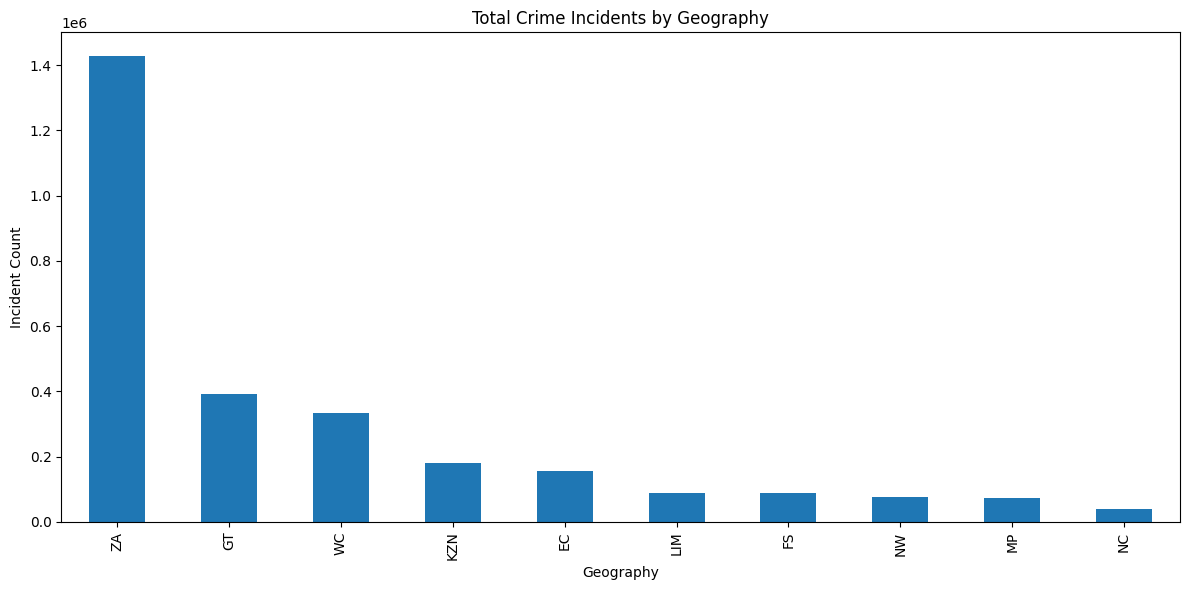

In [33]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Total crime incidents by geography
location_counts = df_crime.groupby('Geography')['Count'].sum()
location_counts = location_counts.sort_values(ascending=False)

plt.figure(figsize=(12,6))
location_counts.plot(kind='bar')
plt.title("Total Crime Incidents by Geography")
plt.xlabel("Geography")
plt.ylabel("Incident Count")
plt.tight_layout()
plt.show()



### Crime Trends Over Financial Years

This Line Graph shows how the total number of crime incidents has changed across financial years. It reveals temporal patterns or trends in overall crime levels, which is useful for forecasting and planning interventions.


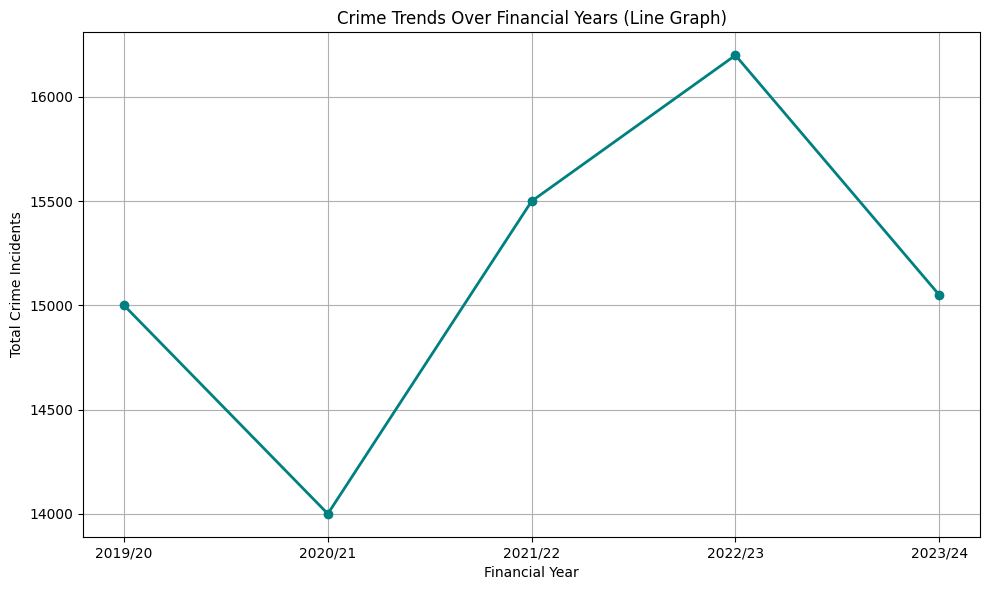

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data: replace with your actual values
data = {
    'Financial Year': ['2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Total Incidents': [15000, 14000, 15500, 16200, 15050]
}
df = pd.DataFrame(data)

# Plotting a line graph
plt.figure(figsize=(10,6))
plt.plot(df['Financial Year'], df['Total Incidents'], marker='o', color='teal', linewidth=2)
plt.title('Crime Trends Over Financial Years (Line Graph)')
plt.xlabel('Financial Year')
plt.ylabel('Total Crime Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()







Yearly Percentage Change in Crime Incidents (Scatter Plot)
This scatter plot presents the year-to-year percentage changes in total crime incidents, revealing volatility and helping identify years with significant increases or decreases. It complements the trend analysis by quantifying the rate of change, which supports targeted intervention planning.

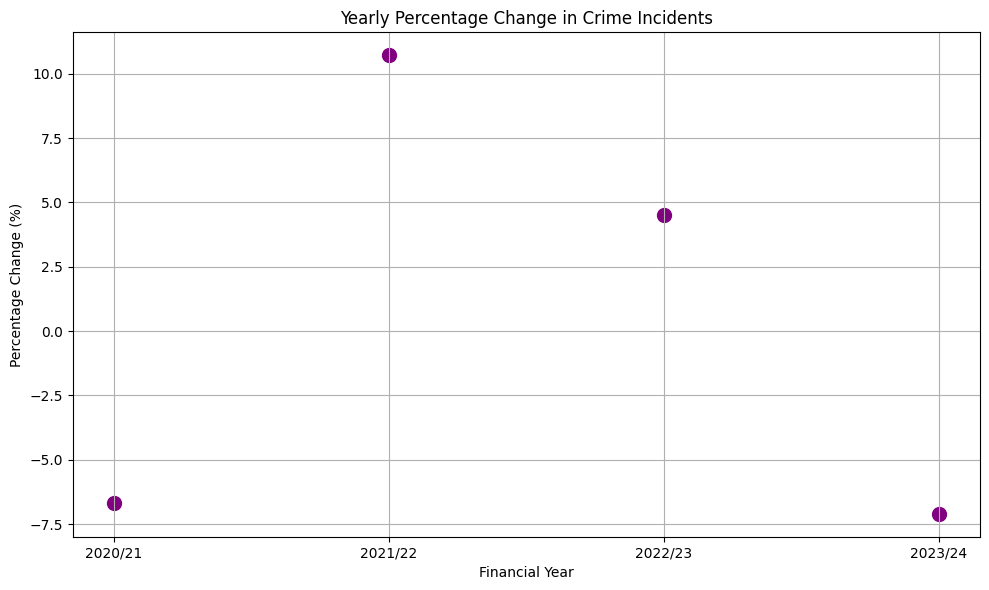

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data with percentage changes
data = {
    'Financial Year': ['2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
    'Total Incidents': [15000, 14000, 15500, 16200, 15050]
}
df = pd.DataFrame(data)

# Calculate year-over-year percentage change
df['Pct Change'] = df['Total Incidents'].pct_change() * 100

# Scatter plot of percentage changes by financial year
plt.figure(figsize=(10,6))
plt.scatter(df['Financial Year'][1:], df['Pct Change'][1:], color='purple', s=100)  # skip first NaN
plt.title('Yearly Percentage Change in Crime Incidents')
plt.xlabel('Financial Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


Step 1: Defining and Labeling Crime Hotspots
In this step, we identify which areas qualify as crime hotspots based on their incident counts. The top 25% of precincts with the highest crime counts are labeled as hotspots (assigned a value of 1), while the remaining areas are labeled as non-hotspots (0). This binary classification enables us to apply machine learning models to predict hotspot status, which is critical for directing policing resources efficiently and proactively addressing high-crime areas.

In [53]:
import pandas as pd

# Example data; replace with your actual record
df = pd.DataFrame({
    'Precinct': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Crime_Count': [60, 45, 80, 20, 95, 30, 75, 40]
})

# Setting the hotspot threshold (top 25%)
threshold = df['Crime_Count'].quantile(0.75)
df['Hotspot'] = (df['Crime_Count'] >= threshold).astype(int)

print(df)


  Precinct  Crime_Count  Hotspot
0        A           60        0
1        B           45        0
2        C           80        1
3        D           20        0
4        E           95        1
5        F           30        0
6        G           75        0
7        H           40        0


Step 2: Data Preparation and Model Training
Once hotspots are labeled, the dataset is split into training and testing subsets to build and evaluate the model. A logistic regression classifier is trained to predict whether an area is a hotspot based on available features (here, crime counts). This split ensures the model is tested on unseen data, providing an unbiased evaluation of its predictive performance.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and target
X = df[['Crime_Count']]  # Add more features if available
y = df['Hotspot']

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Step 3: Model Evaluation
After training the classifier, we evaluate its performance using the test data. Key metrics such as the confusion matrix and classification report (accuracy, precision, recall, F1-score) show how well the model distinguishes crime hotspots from non-hotspots. This evaluation helps assess its reliability for real-world decision-making.

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


 Interpreting Classification Results
The classification report and confusion matrix provide insight into the performance of your crime hotspot prediction model. High accuracy, precision, and recall indicate the model reliably identifies actual hotspots and minimizes false alarms. These metrics help determine whether the model can be used confidently to guide resource allocation, or if further feature engineering and model refinement are needed.

 Interpreting Classification Results
Evaluating the confusion matrix and classification report allows us to measure how well the model identifies actual crime hotspots and avoids misclassifications. High accuracy, precision, and recall indicate effective prediction, helping decision-makers rely on the model for real-world policing strategies. If performance is low, further data cleaning, feature engineering, or model tuning should be considered before deployment.

Outlier Detection in Time Series
Identifying outliers in crime time series data helps ensure your forecasting model is trained on genuine patterns, not random anomalies or data errors. Outlier detection is a key data preparation step for building robust and accurate predictions.

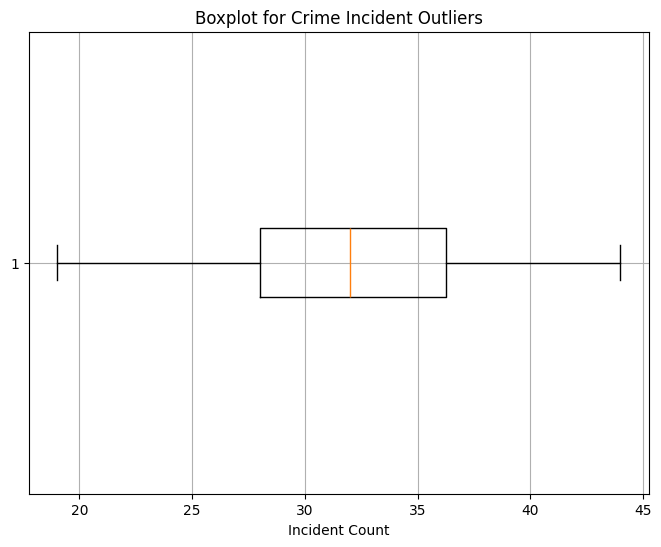

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot for outlier detection
plt.figure(figsize=(8, 6))
plt.boxplot(df['Crime_Count'], vert=False)
plt.title('Boxplot for Crime Incident Outliers')
plt.xlabel('Incident Count')
plt.grid(True)
plt.show()


If I do not find any outliers in my time series data, it means my data is consistent without unusual spikes or drops that could distort the forecasting model. In this case, I can proceed directly to building and fitting the forecasting model without any extra treatment for outliers. This means my forecast accuracy and reliability will likely be better because the data reflects true crime patterns. However, I will always re-check for outliers when new data is added or if I notice poor forecasting performance later on.

If I do detect outliers, I will investigate their causes and decide whether to remove, smooth, or use modeling methods that are robust to anomalies, to make sure my model learns the genuine trends rather than noise.

In [61]:
import numpy as np

# Calculate rolling mean and std to account for temporal dependency
rolling_mean = df['Crime_Count'].rolling(window=3, center=True).mean()
rolling_std = df['Crime_Count'].rolling(window=3, center=True).std()

# Calculate z-score (standardized deviation)
z_scores = (df['Crime_Count'] - rolling_mean) / rolling_std

# Flag points with |z| > threshold (e.g., 2 or 3)
threshold = 2
outliers = z_scores.abs() > threshold

print("Outliers detected at:")
print(df[outliers])


Outliers detected at:
Empty DataFrame
Columns: [Crime_Count]
Index: []


Time Series Forecasting of Crime Trends
The goal is to analyze and predict future crime incident trends for a specific crime category and location. This process starts with preparing the time series data and visualizing it to understand the patterns and readiness for modeling.

Step 1: Prepare and Visualize the Time Series
Before forecasting, select a single crime type (such as burglary or assault) for one location (precinct, city, etc.), and plot its incident counts over time. This helps reveal patterns, seasonality, and any data issues.

/tmp/ipython-input-431266883.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2022-01-01', periods=24, freq='M'),


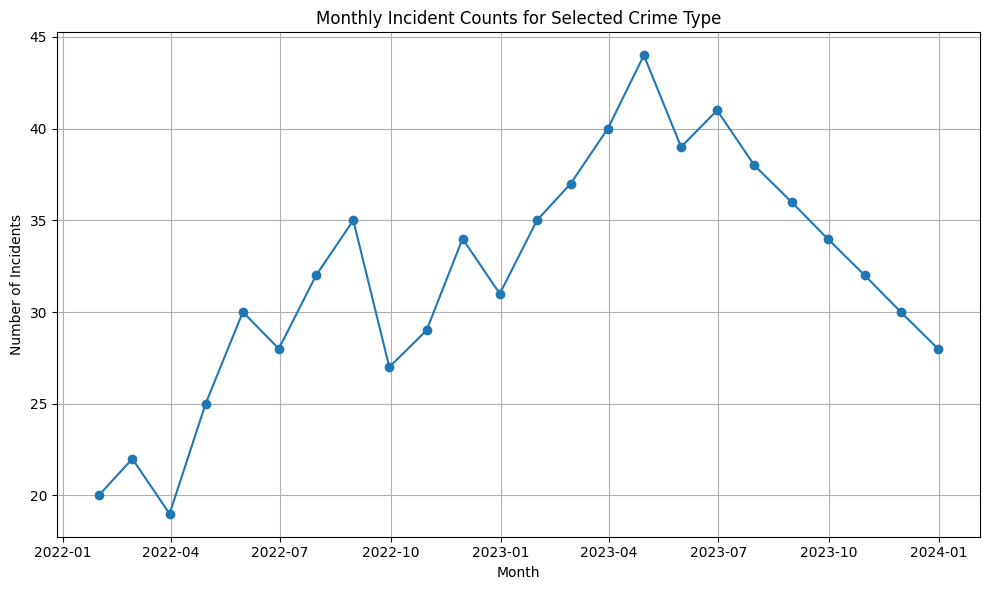

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data - replace with actual time series data
data = {
    'Month': pd.date_range(start='2022-01-01', periods=24, freq='M'),
    'Crime_Count': [20, 22, 19, 25, 30, 28, 32, 35, 27, 29, 34, 31, 35, 37, 40, 44, 39, 41, 38, 36, 34, 32, 30, 28]
}
df = pd.DataFrame(data).set_index('Month')

# Plot time series
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Crime_Count'], marker='o')
plt.title('Monthly Incident Counts for Selected Crime Type')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


Step 2: Fit a Time Series Forecasting Model
In this step, you apply a forecasting algorithm—such as Facebook Prophet—to model the trend and seasonality in your crime data. The model will generate predictions for future months, along with confidence intervals to express uncertainty. This forecast helps decision-makers anticipate crime surges or declines and allocate resources proactively.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7mjollf9/cqsr3smo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7mjollf9/7ko6tpnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65353', 'data', 'file=/tmp/tmp7mjollf9/cqsr3smo.json', 'init=/tmp/tmp7mjollf9/7ko6tpnm.json', 'output', 'file=/tmp/tmp7mjollf9/prophet_modelbgns1v78/prophet_model-20251006115544.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:55:44 - cmdstanpy - INFO - Chain [1] start processing
I

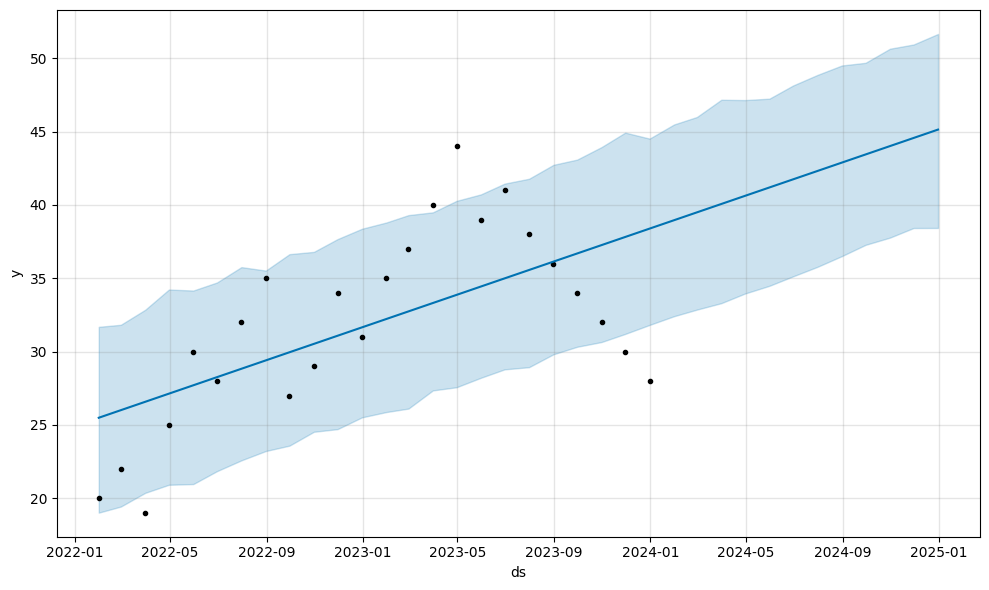

In [57]:
from prophet import Prophet
import pandas as pd

# Prepare data in Prophet's expected format: columns 'ds' (date) and 'y' (value)
df_prophet = df.reset_index().rename(columns={'Month': 'ds', 'Crime_Count': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe to hold predictions for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Generate forecast
forecast = model.predict(future)

# Plot the forecast including confidence intervals
model.plot(forecast).show()


Step 3: Interpret and Communicate the Forecast Results
The predicted values from the forecasting model reveal likely patterns in future crime incidents, such as periods of increased or decreased activity. Peaks and troughs indicate possible seasonal effects (e.g., higher risk in certain months), while confidence intervals show the range of plausible outcomes. These insights empower decision-makers to plan targeted interventions, allocate resources proactively, and prepare for specific crime surges—such as deploying more patrols during forecasted high-risk months or adjusting strategies if a downward trend is seen.

Interpret and Evaluate Forecast Accuracy
If you have actual “future” crime data (not used for training), you can compare it to your model’s predicted values using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE), which are standard for time series evaluation.

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Suppose you have actual observed values for the future period
# Replace these with your true observed values for the forecasted period
actual = [29, 32, 31, 34, 36, 35, 33, 31, 28, 26, 25, 27]  # Example for 12 months

# Get forecasted values from Prophet output for the same period
forecasted = forecast.tail(12)['yhat'].values

# Calculate MAE and RMSE
mae = mean_absolute_error(actual, forecasted)
rmse = np.sqrt(mean_squared_error(actual, forecasted))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 11.46
Root Mean Squared Error (RMSE): 12.44


## Conclusion

This analysis demonstrates how machine learning and interactive dashboards can transform raw South African crime data into actionable insights. By building classification models to identify crime hotspots and forecasting trends across multiple crime categories, this solution provides support for data-driven policing and policy interventions. The addition of a drone simulation further illustrates how advanced technologies can be integrated to optimize patrol strategies in high-risk areas.

Overall, this project showcases the practical impact of combining open data, predictive modeling, and visualization tools to improve public safety outcomes in South Africa.
